In [1]:
import librosa
from skimage import feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.feature import match_template

In [2]:
from scipy.signal import butter, sosfilt, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [33]:
sig1= np.load('WavTemplates/Waldschnepfe_DIG0080_03_Sekunde6.npy')
sig2= np.load('WavTemplates/Waldschnepfe_DIG0080_03_Sekunde9.npy')
sig3= np.load('WavTemplates/Waldschnepfe_DIG0080_03_Sekunde12.npy')
sig4= np.load('WavTemplates/Waldschnepfe_DIG0161_66_Sekunde2.npy')
sig5= np.load('WavTemplates/Waldschnepfe_DIG0161_66_Sekunde6.npy')
sig6= np.load('WavTemplates/ARSU_VP2_20170330_Sekunde4220.npy')
sig7= np.load('WavTemplates/ARSU_VP2_20170330_Sekunde2618.npy')

In [34]:
window=signal.windows.hann(M=2001)
sig7[1700:3701]*=2*window
sig6[1000:3001]*=2*window

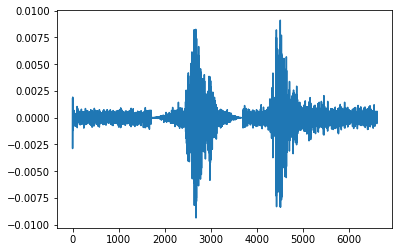

In [35]:
plt.plot(butter_bandpass_filter(sig7, band_freq_min, band_freq_max, fs=rate, order=5))

In [8]:
# FFT and Filtering parameters
band_freq_min=3000
band_freq_max=11020
windowlength=512 # also equals to NFFT
N_overlap=400 # Overlap length in STFT 

In [9]:
rate=22050

In [36]:
filtered_1 = butter_bandpass_filter(sig1, band_freq_min, band_freq_max, fs=rate, order=5)
filtered_2 = butter_bandpass_filter(sig2, band_freq_min, band_freq_max, fs=rate, order=5)
filtered_3 = butter_bandpass_filter(sig3, band_freq_min, band_freq_max, fs=rate, order=5)
filtered_4 = butter_bandpass_filter(sig4, band_freq_min, band_freq_max, fs=rate, order=5)
filtered_5 = butter_bandpass_filter(sig5, band_freq_min, band_freq_max, fs=rate, order=5)
filtered_6 = butter_bandpass_filter(sig6, band_freq_min, band_freq_max, fs=rate, order=5)
filtered_7 = butter_bandpass_filter(sig7, band_freq_min, band_freq_max, fs=rate, order=5)

In [37]:
normed_1=filtered_1/max(filtered_1)
normed_2=filtered_2/max(filtered_2)
normed_3=filtered_3/max(filtered_3)
normed_4=filtered_4/max(filtered_4)
normed_5=filtered_5/max(filtered_5)
normed_6=filtered_6/max(filtered_6)
normed_7=filtered_7/max(filtered_7)

In [38]:
analytic_signal1 = signal.hilbert(normed_1)
analytic_signal2 = signal.hilbert(normed_2)
analytic_signal3 = signal.hilbert(normed_3)
analytic_signal4 = signal.hilbert(normed_4)
analytic_signal5 = signal.hilbert(normed_5)
analytic_signal6 = signal.hilbert(normed_6)
analytic_signal7 = signal.hilbert(normed_7)

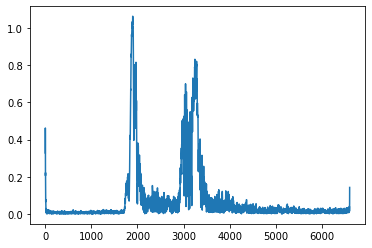

In [65]:
plt.plot(np.abs(analytic_signal1))

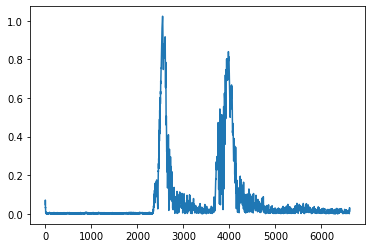

In [66]:
plt.plot(np.abs(analytic_signal2))

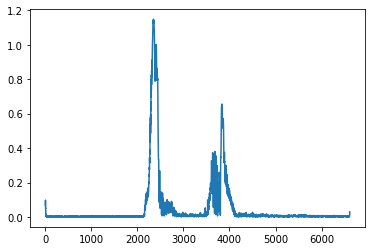

In [67]:
plt.plot(np.abs(analytic_signal3))

In [39]:
corr_11=signal.correlate(np.abs(analytic_signal1),np.abs(analytic_signal1))
corr_12=signal.correlate(np.abs(analytic_signal1),np.abs(analytic_signal2))
corr_13=signal.correlate(np.abs(analytic_signal1),np.abs(analytic_signal3))
corr_14=signal.correlate(np.abs(analytic_signal1),np.abs(analytic_signal4))
corr_15=signal.correlate(np.abs(analytic_signal1),np.abs(analytic_signal5))
corr_16=signal.correlate(np.abs(analytic_signal1),np.abs(analytic_signal6))
corr_17=signal.correlate(np.abs(analytic_signal1),np.abs(analytic_signal7))
corr_16[:5000]=0
corr_16[:5000]=0

In [40]:
shift=np.argmax(corr_12)-np.argmax(corr_11)
an2=np.roll(analytic_signal2,shift)

shift=np.argmax(corr_13)-np.argmax(corr_11)
an3=np.roll(analytic_signal3,shift)

shift=np.argmax(corr_14)-np.argmax(corr_11)
an4=np.roll(analytic_signal4,shift)

shift=np.argmax(corr_15)-np.argmax(corr_11)
an5=np.roll(analytic_signal5,shift)

shift=np.argmax(corr_16)-np.argmax(corr_11)
an6=np.roll(analytic_signal6,shift)

shift=np.argmax(corr_17)-np.argmax(corr_11)
an7=np.roll(analytic_signal7,shift)

an1=analytic_signal1

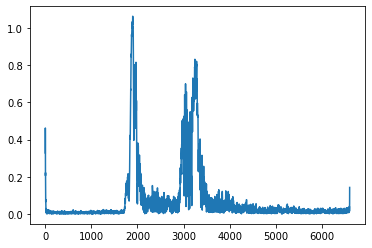

In [41]:
plt.plot(np.abs(an1))

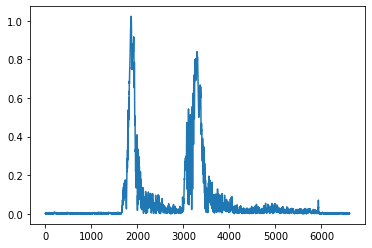

In [42]:
plt.plot(np.abs(an2))

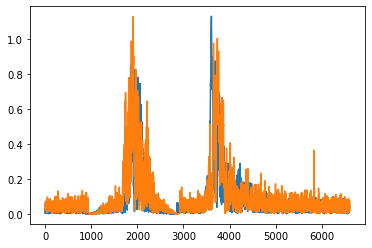

In [48]:
plt.plot(np.abs(an6))
plt.plot(np.abs(an7))

In [83]:
savgov_wind_size=81
instantaneous_phase = np.unwrap(np.angle(an1))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi))*rate
inst_freq1 = signal.savgol_filter(instantaneous_frequency, savgov_wind_size,1)
instantaneous_phase = np.unwrap(np.angle(an2))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi))*rate
inst_freq2 = signal.savgol_filter(instantaneous_frequency, savgov_wind_size,1)
instantaneous_phase = np.unwrap(np.angle(an3))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi))*rate
inst_freq3 = signal.savgol_filter(instantaneous_frequency, savgov_wind_size,1)
instantaneous_phase = np.unwrap(np.angle(an4))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi))*rate
inst_freq4 = signal.savgol_filter(instantaneous_frequency, savgov_wind_size,1)
instantaneous_phase = np.unwrap(np.angle(an5))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi))*rate
inst_freq5 = signal.savgol_filter(instantaneous_frequency, savgov_wind_size,1)
instantaneous_phase = np.unwrap(np.angle(an6))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi))*rate
inst_freq6 = signal.savgol_filter(instantaneous_frequency, savgov_wind_size,1)
instantaneous_phase = np.unwrap(np.angle(an7))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi))*rate
inst_freq7 = signal.savgol_filter(instantaneous_frequency, savgov_wind_size,1)

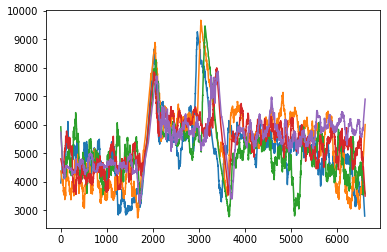

In [84]:
plt.plot(inst_freq1)
plt.plot(inst_freq2)
plt.plot(inst_freq3)
plt.plot(inst_freq4)
plt.plot(inst_freq5)
#plt.plot(inst_freq6)
#plt.plot(inst_freq7)


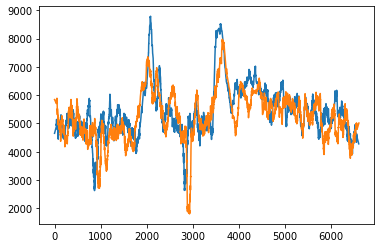

In [85]:
plt.plot(inst_freq6)
plt.plot(inst_freq7)

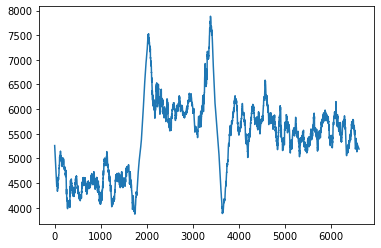

In [86]:
inst_freq_4and5=0.5*(inst_freq4+inst_freq5)
plt.plot(inst_freq_4and5)

In [114]:
inst_freq3=inst_freq3[:6604]
inst_freq2=inst_freq2[:6604]

In [118]:
np.save('inst_freq_4and5', inst_freq_4and5)

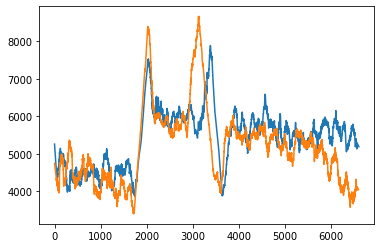

In [119]:
plt.plot(inst_freq_4and5)
plt.plot(inst_freq_first3)

In [88]:
inst_freq_6and7=0.5*(inst_freq6+inst_freq7[:6605])
np.save('inst_freq_6and7_savgov41', inst_freq_6and7)

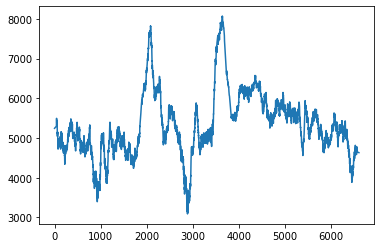

In [89]:
plt.plot(inst_freq_6and7)

In [21]:
np.save('inst_freq_6and7.npy',inst6and7)

In [49]:
shift=np.argmax(corr_12)-np.argmax(corr_11)
norm_shift_2=np.roll(normed_2,shift)

shift=np.argmax(corr_13)-np.argmax(corr_11)
norm_shift_3=np.roll(normed_3,shift)

shift=np.argmax(corr_14)-np.argmax(corr_11)
norm_shift_4=np.roll(normed_4,shift)

shift=np.argmax(corr_15)-np.argmax(corr_11)
norm_shift_5=np.roll(normed_5,shift)

shift=np.argmax(corr_16)-np.argmax(corr_11)
norm_shift_6=np.roll(normed_6,shift)

shift=np.argmax(corr_17)-np.argmax(corr_11)
norm_shift_7=np.roll(normed_7,shift)

norm_shift_1=normed_1

In [66]:
synthetic=norm_shift_4[:6605]+norm_shift_5[:6605]

In [67]:
windowlength=512 # also equals to NFFT
N_overlap=400 # Overlap length in STFT 

In [71]:
f, t, Syy = signal.stft(synthetic, fs=rate,window='hann',noverlap=N_overlap,nfft=windowlength,nperseg=windowlength)
delta_T=t[1]
Syy=abs(Syy)
# Syy = librosa.amplitude_to_db(S=Syy,ref=np.max,amin=1e-05,top_db=85)
# Syy = np.log10(Syy)
print(Syy.shape)
print ('Freq resolution:', f[1], 'Time Resolution:', t[1])

(257, 60)
Freq resolution: 43.06640625 Time Resolution: 0.005079365079365078


Text(0.5, 0, 'Time [sec]')

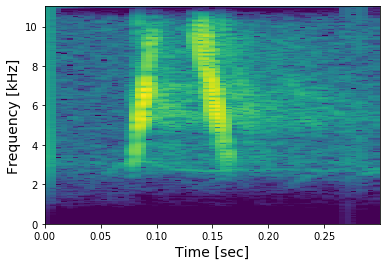

In [64]:
plt.pcolormesh(t[:],f[:]/1e3,Syy[:,:])
plt.ylabel('Frequency [kHz]', fontsize=14)
plt.xlabel('Time [sec]',fontsize=14)

In [65]:
np.save('synthetic_123_fft512_400.npy',Syy)

In [184]:
# librosa.output.write_wav('SyntheticTemplate2.wav',synthetic,sr=22050)

Text(0.5, 0, 'Time [sec]')

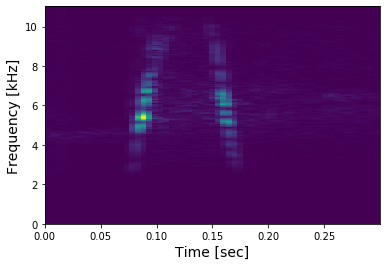

In [72]:
plt.pcolormesh(t[:],f[:]/1e3,Syy[:,:])
plt.ylabel('Frequency [kHz]', fontsize=14)
plt.xlabel('Time [sec]',fontsize=14)

In [73]:
np.save('synthetic_45_fft512_400_abs.npy',Syy)